## Lambda Functions

A lambda fn is a small anonymous function

lambda arguments : expression

> A lambda fn can take any number or argumnets,but can only havr one expression.

In [1]:
add = lambda a, b:a+b
add(2,3)

5

In [2]:
nums = [1, 2, 3, 4, 5, 6]

nums_power_2 = map(lambda num:num**2, nums)
list(nums_power_2)

[1, 4, 9, 16, 25, 36]

In [3]:
import pandas as pd
df = pd.read_csv('Yelp_Reviews.csv', index_col=0)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g
10,yFumR3CWzpfvTH2FCthvVw,0,2016-06-15,0,STiFMww2z31siPY7BWNC2g,5,I have been an Emerald Club member for a numbe...,0,TlvV-xJhmh7LCwJYXkV-cg


## Simple `lambda` function

In [4]:
df['text'].map(lambda x: len(x.split())).head()

1     58
2     30
4     30
5     82
10    32
Name: text, dtype: int64

In [5]:
df['text'].map(lambda review_text:len(review_text.split())).head()

1     58
2     30
4     30
5     82
10    32
Name: text, dtype: int64

## Lambda functions with conditionals

In [6]:
df['text'].map(lambda x: "Good" if any([word in x.lower()for word in ['awesome', 'love', 'good', 'great']])else 'Bad').head()

1     Good
2      Bad
4     Good
5      Bad
10     Bad
Name: text, dtype: object

**Returning to a more manageable example...**

In [7]:
# Select the year from the date string
df.date.map(lambda x: x[:4]).head()

1     2012
2     2014
4     2014
5     2011
10    2016
Name: date, dtype: object

**Lambda fns are also useful within the `sort()` fn**

In [8]:
# Without a key
names = ['Miriam Marks','Sidney Baird','Elaine Barrera','Eddie Reeves','Marley Beard',
         'Jaiden Liu','Bethany Martin','Stephen Rios','Audrey Mayer','Kameron Davidson',
         'Carter Wong','Teagan Bennett']
sorted(names)

['Audrey Mayer',
 'Bethany Martin',
 'Carter Wong',
 'Eddie Reeves',
 'Elaine Barrera',
 'Jaiden Liu',
 'Kameron Davidson',
 'Marley Beard',
 'Miriam Marks',
 'Sidney Baird',
 'Stephen Rios',
 'Teagan Bennett']

In [9]:
# Sorting by last name
sorted(names, key=lambda x: x.split()[1])

['Sidney Baird',
 'Elaine Barrera',
 'Marley Beard',
 'Teagan Bennett',
 'Kameron Davidson',
 'Jaiden Liu',
 'Miriam Marks',
 'Bethany Martin',
 'Audrey Mayer',
 'Eddie Reeves',
 'Stephen Rios',
 'Carter Wong']

**Experiment and solve for individual cases first**

Before trying to write a function to apply to an entire series, it's typically easier to attempt to solve for an individual case. For example, if we're trying to determine the number of words in a review, we can try and do this for a single review first.

In [11]:
example = df.text.iloc[0]
example

'I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!'

In [12]:
example.split()

['I',
 'love',
 'this',
 'place!',
 'My',
 'fiance',
 'And',
 'I',
 'go',
 'here',
 'atleast',
 'once',
 'a',
 'week.',
 'The',
 'portions',
 'are',
 'huge!',
 'Food',
 'is',
 'amazing.',
 'I',
 'love',
 'their',
 'carne',
 'asada.',
 'They',
 'have',
 'great',
 'lunch',
 'specials...',
 'Leticia',
 'is',
 'super',
 'nice',
 'and',
 'cares',
 'about',
 'what',
 'you',
 'think',
 'of',
 'her',
 'restaurant.',
 'You',
 'have',
 'to',
 'try',
 'their',
 'cheese',
 'enchiladas',
 'too',
 'the',
 'sauce',
 'is',
 'different',
 'And',
 'amazing!!!']

In [13]:
len(example.split())

58

In [14]:
# Solving for all
df.text.map(lambda x: len(x.split())).head()

1     58
2     30
4     30
5     82
10    32
Name: text, dtype: int64

In [18]:
# Do extra spaces and punctiations affect the output
'this is a       weird test!!!Can we break it???'.split()
# extra spaces won't break our function,
# but missing a space after punctuation will. 

['this', 'is', 'a', 'weird', 'test!!!Can', 'we', 'break', 'it???']

## Combining % and //

This is useful when creating subplots.
Below, iterate through 12 elements aranging them into 3 rows and 4 columns

In [21]:
for i in range(12):
    print(f"i: {i}, Row: {i//4} Column: {i%4}")

i: 0, Row: 0 Column: 0
i: 1, Row: 0 Column: 1
i: 2, Row: 0 Column: 2
i: 3, Row: 0 Column: 3
i: 4, Row: 1 Column: 0
i: 5, Row: 1 Column: 1
i: 6, Row: 1 Column: 2
i: 7, Row: 1 Column: 3
i: 8, Row: 2 Column: 0
i: 9, Row: 2 Column: 1
i: 10, Row: 2 Column: 2
i: 11, Row: 2 Column: 3


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

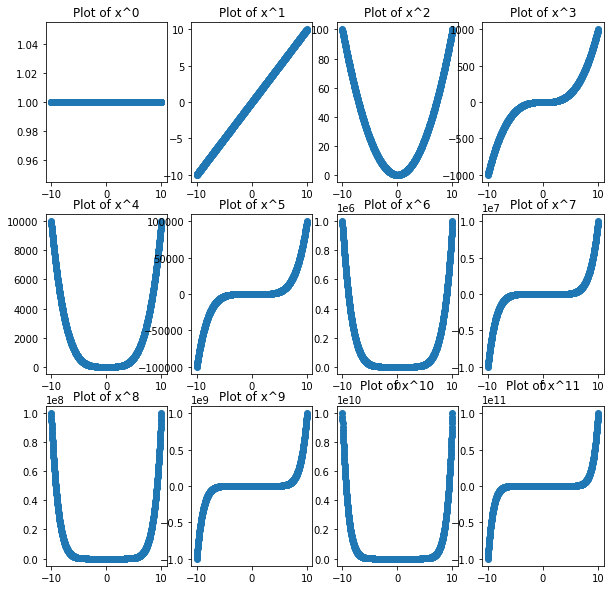

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (10, 10))
x = np.linspace(start=-10, stop=10, num=10*83)
for i in range(12):
    row = i//4
    col = i%4
    ax = axes[row, col]
    ax.scatter(x,x**i)
    ax.set_title('Plot of x^{}'.format(i))
plt.show()